In [33]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
#Carga desde un archivo .csv sin indice
data= pd.read_csv('Act 3.3 valores nulos paises.csv') 

In [35]:
#Verificamos información del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18927 entries, 0 to 18926
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0.1                  18927 non-null  int64  
 1   Unnamed: 0                    18927 non-null  int64  
 2   id                            18927 non-null  int64  
 3   scrape_id                     18927 non-null  int64  
 4   host_id                       18927 non-null  int64  
 5   latitude                      18927 non-null  float64
 6   longitude                     18927 non-null  float64
 7   neighbourhood_cleansed        18927 non-null  object 
 8   neighbourhood_group_cleansed  18927 non-null  object 
 9   property_type                 18927 non-null  object 
 10  room_type                     18927 non-null  object 
 11  host_since                    18927 non-null  object 
 12  host_location                 18927 non-null  object 
 13  h

In [36]:
#Corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

Unnamed: 0.1                       0
Unnamed: 0                         0
id                                 0
scrape_id                          0
host_id                            0
latitude                           0
longitude                          0
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
property_type                      0
room_type                          0
host_since                         0
host_location                      0
host_response_time                 0
host_response_rate                 0
host_acceptance_rate               0
host_is_superhost                  0
host_listings_count                0
host_total_listings_count          0
host_has_profile_pic               0
host_identity_verified             0
accommodates                       0
bathrooms                          0
bathrooms_text                     0
bedrooms                           0
beds                               0
amenities                          0
p

In [37]:
data = data.drop(columns=['Unnamed: 0'])
data = data.drop(columns=['Unnamed: 0.1'])
data = data.drop(columns=['id'])
data = data.drop(columns=['scrape_id'])
data = data.drop(columns=['host_id'])

In [38]:
data["host_response_rate"] = data["host_response_rate"].str.replace("%", "", regex=False).astype(float)

In [39]:
data["price"] = data["price"].replace({'\$': '', ',': ''}, regex=True)  # Eliminamos $ y comas
data["price"] = data["price"].astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/var/folders/dh/cmb1ntws385frzlj801tcrjc0000gn/T/ipykernel_55569/145616731.py:1: SyntaxWarning: invalid escape sequence '\$'
  data["price"] = data["price"].replace({'\$': '', ',': ''}, regex=True)  # Eliminamos $ y comas


In [40]:
# 🔹 Selección manual de columnas (según criterio personal)
mis_cuantitativas = ["host_response_rate", "host_listings_count", "host_total_listings_count","bedrooms", "beds", "price", "minimum_nights", "maximum_nights", "minimum_minimum_nights","maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights","accommodates","bathrooms", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "availability_30","availability_60",	"availability_90",	"availability_365",	"availability_eoy",	"number_of_reviews","number_of_reviews_ltm","number_of_reviews_l30d","number_of_reviews_ly","reviews_per_month","review_scores_rating",	"review_scores_accuracy","review_scores_cleanliness","review_scores_communication",	"review_scores_location"]   # Cambia según tus columnas
mis_cualitativas = ["latitude", "longitude", "neighbourhood_cleansed", "property_type", "room_type", "host_since", "host_location", "host_response_time", "host_is_superhost", "host_has_profile_pic", "host_identity_verified", "bathrooms_text",
                    "amenities", "has_availability"] # Cambia según tus columnas

# Filtramos el DataFrame usando las listas
cuantitativas = data[mis_cuantitativas]
cualitativas = data[mis_cualitativas]

# Mostramos resultados
print("Columnas cuantitativas seleccionadas:")
print(cuantitativas.dtypes)

print("\nColumnas cualitativas seleccionadas:")
print(cualitativas.dtypes)

Columnas cuantitativas seleccionadas:
host_response_rate             float64
host_listings_count            float64
host_total_listings_count      float64
bedrooms                       float64
beds                           float64
price                          float64
minimum_nights                   int64
maximum_nights                   int64
minimum_minimum_nights         float64
maximum_minimum_nights         float64
minimum_maximum_nights         float64
maximum_maximum_nights         float64
accommodates                     int64
bathrooms                      float64
minimum_nights_avg_ntm         float64
maximum_nights_avg_ntm         float64
availability_30                  int64
availability_60                  int64
availability_90                  int64
availability_365                 int64
availability_eoy                 int64
number_of_reviews                int64
number_of_reviews_ltm            int64
number_of_reviews_l30d           int64
number_of_reviews_ly      

In [41]:
print(cualitativas.dtypes)

latitude                  float64
longitude                 float64
neighbourhood_cleansed     object
property_type              object
room_type                  object
host_since                 object
host_location              object
host_response_time         object
host_is_superhost          object
host_has_profile_pic       object
host_identity_verified     object
bathrooms_text             object
amenities                  object
has_availability           object
dtype: object


In [42]:
print("\nColumnas cualitativas:")
print(cualitativas.dtypes)


Columnas cualitativas:
latitude                  float64
longitude                 float64
neighbourhood_cleansed     object
property_type              object
room_type                  object
host_since                 object
host_location              object
host_response_time         object
host_is_superhost          object
host_has_profile_pic       object
host_identity_verified     object
bathrooms_text             object
amenities                  object
has_availability           object
dtype: object


<Figure size 1500x800 with 0 Axes>

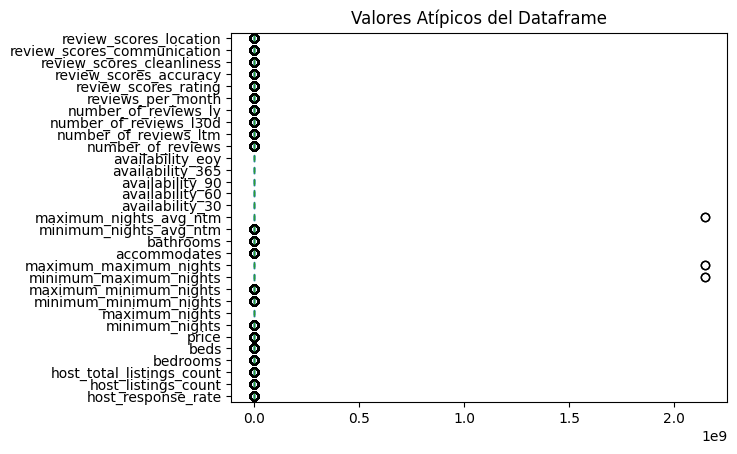

In [43]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
#MÉTODO CUARTÍLICO: CONSIDERA MÁS ATÍPICOS
fig = plt.figure(figsize =(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

**PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME**


In [44]:
#Método aplicando desviación estandar. Encuentro los valores extremos

#ESTE MÉTODO CONSIDERA MENOS ATÍPICOS


y=cuantitativas
Limite_Superior= y.mean() + 3*y.std() #SE AGREGAN 3 DESVIACIONES ESTANDAR 
Limite_Inferior= y.mean() - 3*y.std() #SE RESTAN 3 STV PARA ASEGURAR EL 95.5% DE LA INFO.
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido host_response_rate             1.440894e+02
host_listings_count            6.032539e+02
host_total_listings_count      7.260175e+02
bedrooms                       5.841367e+00
beds                           8.835612e+00
price                          1.370588e+03
minimum_nights                 1.054445e+02
maximum_nights                 1.720753e+03
minimum_minimum_nights         9.241182e+01
maximum_minimum_nights         2.068142e+02
minimum_maximum_nights         6.645825e+07
maximum_maximum_nights         6.645831e+07
accommodates                   1.020081e+01
bathrooms                      3.984821e+00
minimum_nights_avg_ntm         1.627076e+02
maximum_nights_avg_ntm         6.645123e+07
availability_30                4.032269e+01
availability_60                8.649867e+01
availability_90                1.348366e+02
availability_365               5.673466e+02
availability_eoy               3.046552e+02
number_of_reviews              3.670963e+02
number

In [45]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
#CONDICIÓN PARA ELIMINAR LOS OUTLIERS FUERA DE LOS LÍMITES
data3= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,host_response_rate,host_listings_count,host_total_listings_count,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location
0,96.0,44.0,46.0,3.0,6.0,232.0,1.0,1125,1.0,5.0,...,48.0,6.0,2.0,5.0,0.33,4.30,4.36,4.53,4.60,4.81
1,100.0,6.0,9.0,3.0,4.0,382.0,3.0,32,2.0,7.0,...,88.0,10.0,1.0,7.0,0.51,4.82,4.94,4.90,4.99,4.65
2,100.0,3.0,15.0,2.0,3.0,186.0,1.0,31,1.0,1.0,...,147.0,26.0,0.0,37.0,0.87,4.46,4.44,4.38,4.89,4.89
3,80.0,5.0,5.0,1.0,1.0,131.0,31.0,180,31.0,31.0,...,25.0,9.0,0.0,17.0,0.14,4.36,4.45,4.55,4.68,4.73
4,87.0,356.0,565.0,1.0,3.0,285.0,2.0,330,2.0,2.0,...,3.0,0.0,0.0,1.0,0.02,4.00,4.67,4.00,3.67,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18922,100.0,224.0,262.0,3.0,5.0,189.0,1.0,365,1.0,5.0,...,0.0,0.0,0.0,0.0,NaN,NaN,4.70,4.80,4.70,4.80
18923,100.0,224.0,262.0,3.0,6.0,214.0,1.0,365,1.0,5.0,...,0.0,0.0,0.0,0.0,NaN,NaN,4.70,4.80,4.70,4.80
18924,100.0,224.0,262.0,3.0,6.0,191.0,1.0,365,1.0,5.0,...,0.0,0.0,0.0,0.0,NaN,NaN,4.70,4.80,4.70,4.80
18925,100.0,224.0,262.0,3.0,5.0,238.0,1.0,365,1.0,5.0,...,0.0,0.0,0.0,0.0,NaN,NaN,4.70,4.80,4.70,4.80


In [59]:
#Corroboramos valores nulos del dataframe4
valores_nulos=data3.isnull().sum().sum()
valores_nulos

np.int64(20598)

In [47]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))
data_clean

,host_response_rate,host_listings_count,host_total_listings_count,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location
0,96.0,44.0,46.0,3.0,6.0,232.0,1.0,1125,1.0,5.0,...,48.0,6.0,2.0,5.0,0.33,4.30,4.36,4.53,4.60,4.81
1,100.0,6.0,9.0,3.0,4.0,382.0,3.0,32,2.0,7.0,...,88.0,10.0,1.0,7.0,0.51,4.82,4.94,4.90,4.99,4.65
2,100.0,3.0,15.0,2.0,3.0,186.0,1.0,31,1.0,1.0,...,147.0,26.0,0.0,37.0,0.87,4.46,4.44,4.38,4.89,4.89
3,80.0,5.0,5.0,1.0,1.0,131.0,31.0,180,31.0,31.0,...,25.0,9.0,0.0,17.0,0.14,4.36,4.45,4.55,4.68,4.73
4,87.0,356.0,565.0,1.0,3.0,285.0,2.0,330,2.0,2.0,...,3.0,0.0,0.0,1.0,0.02,4.00,4.67,4.00,3.67,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18922,100.0,224.0,262.0,3.0,5.0,189.0,1.0,365,1.0,5.0,...,0.0,0.0,0.0,0.0,1.30,4.70,4.70,4.80,4.70,4.80
18923,100.0,224.0,262.0,3.0,6.0,214.0,1.0,365,1.0,5.0,...,0.0,0.0,0.0,0.0,1.30,4.70,4.70,4.80,4.70,4.80
18924,100.0,224.0,262.0,3.0,6.0,191.0,1.0,365,1.0,5.0,...,0.0,0.0,0.0,0.0,1.30,4.70,4.70,4.80,4.70,4.80
18925,100.0,224.0,262.0,3.0,5.0,238.0,1.0,365,1.0,5.0,...,0.0,0.0,0.0,0.0,1.30,4.70,4.70,4.80,4.70,4.80


In [48]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

host_response_rate             0
host_listings_count            0
host_total_listings_count      0
bedrooms                       0
beds                           0
price                          0
minimum_nights                 0
maximum_nights                 0
minimum_minimum_nights         0
maximum_minimum_nights         0
minimum_maximum_nights         0
maximum_maximum_nights         0
accommodates                   0
bathrooms                      0
minimum_nights_avg_ntm         0
maximum_nights_avg_ntm         0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
availability_eoy               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
number_of_reviews_ly           0
reviews_per_month              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_communication    0
review_sco

In [49]:
Datos_limpios_stdv = pd.concat([cualitativas, data_clean], axis=1)
Datos_limpios_stdv

,latitude,longitude,neighbourhood_cleansed,property_type,room_type,host_since,host_location,host_response_time,host_is_superhost,host_has_profile_pic,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location
0,41.405560,2.172620,la Sagrada Família,Entire rental unit,Entire home/apt,2010-01-19,"Barcelona, Spain",within an hour,f,t,...,48.0,6.0,2.0,5.0,0.33,4.30,4.36,4.53,4.60,4.81
1,41.412432,2.219750,el Besòs i el Maresme,Entire rental unit,Entire home/apt,2010-03-09,"Catalonia, Spain",within an hour,t,t,...,88.0,10.0,1.0,7.0,0.51,4.82,4.94,4.90,4.99,4.65
2,41.405660,2.170150,el Camp d'en Grassot i Gràcia Nova,Entire rental unit,Entire home/apt,2010-05-31,"Barcelona, Spain",within an hour,f,t,...,147.0,26.0,0.0,37.0,0.87,4.46,4.44,4.38,4.89,4.89
3,41.380620,2.175170,el Barri Gòtic,Entire condo,Entire home/apt,2010-01-24,"Barcelona, Spain",within an hour,f,t,...,25.0,9.0,0.0,17.0,0.14,4.36,4.45,4.55,4.68,4.73
4,41.376400,2.191020,la Barceloneta,Entire rental unit,Entire home/apt,2011-11-27,"Barcelona, Spain",within an hour,f,t,...,3.0,0.0,0.0,1.0,0.02,4.00,4.67,4.00,3.67,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18922,41.399220,2.178950,el Fort Pienc,Entire rental unit,Entire home/apt,2012-12-21,"Barcelona, Spain",within an hour,f,t,...,0.0,0.0,0.0,0.0,1.30,4.70,4.70,4.80,4.70,4.80
18923,41.399790,2.180350,el Fort Pienc,Entire rental unit,Entire home/apt,2012-12-21,"Barcelona, Spain",within an hour,f,t,...,0.0,0.0,0.0,0.0,1.30,4.70,4.70,4.80,4.70,4.80
18924,41.399390,2.180520,el Fort Pienc,Entire rental unit,Entire home/apt,2012-12-21,"Barcelona, Spain",within an hour,f,t,...,0.0,0.0,0.0,0.0,1.30,4.70,4.70,4.80,4.70,4.80
18925,41.400813,2.180756,el Fort Pienc,Entire rental unit,Entire home/apt,2012-12-21,"Barcelona, Spain",within an hour,f,t,...,0.0,0.0,0.0,0.0,1.30,4.70,4.70,4.80,4.70,4.80


**PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**


In [50]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=cuantitativas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_response_rate              110.500
host_listings_count             114.500
host_total_listings_count       203.000
bedrooms                          3.500
beds                              6.000
price                           529.000
minimum_nights                   76.000
maximum_nights                 2317.500
minimum_minimum_nights           76.000
maximum_minimum_nights           75.500
minimum_maximum_nights         2410.500
maximum_maximum_nights         2317.500
accommodates                      7.000
bathrooms                         3.500
minimum_nights_avg_ntm           75.000
maximum_nights_avg_ntm         2317.500
availability_30                  42.500
availability_60                 101.000
availability_90                 157.000
availability_365                650.000
availability_eoy                343.000
number_of_reviews               132.500
number_of_reviews_ltm            37.500
number_of_reviews_l30d            2.500
number_of_revi

In [51]:
#Obtenemos datos limpios del Dataframe
data3_iqr= cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,host_response_rate,host_listings_count,host_total_listings_count,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location
0,96.0,44.0,46.0,3.0,6.0,232.0,1.0,1125,1.0,5.0,...,48.0,6.0,2.0,5.0,0.33,4.30,4.36,4.53,4.60,4.81
1,100.0,6.0,9.0,3.0,4.0,382.0,3.0,32,2.0,7.0,...,88.0,10.0,1.0,7.0,0.51,4.82,4.94,4.90,4.99,4.65
2,100.0,3.0,15.0,2.0,3.0,186.0,1.0,31,1.0,1.0,...,NaN,26.0,0.0,NaN,0.87,4.46,4.44,4.38,4.89,4.89
3,NaN,5.0,5.0,1.0,1.0,131.0,31.0,180,31.0,31.0,...,25.0,9.0,0.0,17.0,0.14,4.36,4.45,4.55,4.68,4.73
4,87.0,NaN,NaN,1.0,3.0,285.0,2.0,330,2.0,2.0,...,3.0,0.0,0.0,1.0,0.02,4.00,4.67,NaN,NaN,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18922,100.0,NaN,NaN,3.0,5.0,189.0,1.0,365,1.0,5.0,...,0.0,0.0,0.0,0.0,NaN,NaN,4.70,4.80,4.70,4.80
18923,100.0,NaN,NaN,3.0,6.0,214.0,1.0,365,1.0,5.0,...,0.0,0.0,0.0,0.0,NaN,NaN,4.70,4.80,4.70,4.80
18924,100.0,NaN,NaN,3.0,6.0,191.0,1.0,365,1.0,5.0,...,0.0,0.0,0.0,0.0,NaN,NaN,4.70,4.80,4.70,4.80
18925,100.0,NaN,NaN,3.0,5.0,238.0,1.0,365,1.0,5.0,...,0.0,0.0,0.0,0.0,NaN,NaN,4.70,4.80,4.70,4.80


In [60]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum().sum()
valores_nulos

np.int64(45195)

In [53]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data4_iqr=data3_iqr.copy()
data4_iqr=data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,host_response_rate,host_listings_count,host_total_listings_count,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location
0,96.0,44.0,46.0,3.0,6.0,232.0,1.0,1125,1.0,5.0,...,48.0,6.0,2.0,5.0,0.33,4.30,4.36,4.53,4.60,4.81
1,100.0,6.0,9.0,3.0,4.0,382.0,3.0,32,2.0,7.0,...,88.0,10.0,1.0,7.0,0.51,4.82,4.94,4.90,4.99,4.65
2,100.0,3.0,15.0,2.0,3.0,186.0,1.0,31,1.0,1.0,...,19.4,26.0,0.0,3.8,0.87,4.46,4.44,4.38,4.89,4.89
3,98.0,5.0,5.0,1.0,1.0,131.0,31.0,180,31.0,31.0,...,25.0,9.0,0.0,17.0,0.14,4.36,4.45,4.55,4.68,4.73
4,87.0,13.7,30.1,1.0,3.0,285.0,2.0,330,2.0,2.0,...,3.0,0.0,0.0,1.0,0.02,4.00,4.67,4.80,4.80,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18922,100.0,13.7,30.1,3.0,5.0,189.0,1.0,365,1.0,5.0,...,0.0,0.0,0.0,0.0,1.20,4.70,4.70,4.80,4.70,4.80
18923,100.0,13.7,30.1,3.0,6.0,214.0,1.0,365,1.0,5.0,...,0.0,0.0,0.0,0.0,1.20,4.70,4.70,4.80,4.70,4.80
18924,100.0,13.7,30.1,3.0,6.0,191.0,1.0,365,1.0,5.0,...,0.0,0.0,0.0,0.0,1.20,4.70,4.70,4.80,4.70,4.80
18925,100.0,13.7,30.1,3.0,5.0,238.0,1.0,365,1.0,5.0,...,0.0,0.0,0.0,0.0,1.20,4.70,4.70,4.80,4.70,4.80


In [54]:
# Unimos el dataframe cuantitativo limpio con el dataframe cualitativo

Datos_limpios_iqr = pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios_iqr

,latitude,longitude,neighbourhood_cleansed,property_type,room_type,host_since,host_location,host_response_time,host_is_superhost,host_has_profile_pic,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location
0,41.405560,2.172620,la Sagrada Família,Entire rental unit,Entire home/apt,2010-01-19,"Barcelona, Spain",within an hour,f,t,...,48.0,6.0,2.0,5.0,0.33,4.30,4.36,4.53,4.60,4.81
1,41.412432,2.219750,el Besòs i el Maresme,Entire rental unit,Entire home/apt,2010-03-09,"Catalonia, Spain",within an hour,t,t,...,88.0,10.0,1.0,7.0,0.51,4.82,4.94,4.90,4.99,4.65
2,41.405660,2.170150,el Camp d'en Grassot i Gràcia Nova,Entire rental unit,Entire home/apt,2010-05-31,"Barcelona, Spain",within an hour,f,t,...,19.4,26.0,0.0,3.8,0.87,4.46,4.44,4.38,4.89,4.89
3,41.380620,2.175170,el Barri Gòtic,Entire condo,Entire home/apt,2010-01-24,"Barcelona, Spain",within an hour,f,t,...,25.0,9.0,0.0,17.0,0.14,4.36,4.45,4.55,4.68,4.73
4,41.376400,2.191020,la Barceloneta,Entire rental unit,Entire home/apt,2011-11-27,"Barcelona, Spain",within an hour,f,t,...,3.0,0.0,0.0,1.0,0.02,4.00,4.67,4.80,4.80,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18922,41.399220,2.178950,el Fort Pienc,Entire rental unit,Entire home/apt,2012-12-21,"Barcelona, Spain",within an hour,f,t,...,0.0,0.0,0.0,0.0,1.20,4.70,4.70,4.80,4.70,4.80
18923,41.399790,2.180350,el Fort Pienc,Entire rental unit,Entire home/apt,2012-12-21,"Barcelona, Spain",within an hour,f,t,...,0.0,0.0,0.0,0.0,1.20,4.70,4.70,4.80,4.70,4.80
18924,41.399390,2.180520,el Fort Pienc,Entire rental unit,Entire home/apt,2012-12-21,"Barcelona, Spain",within an hour,f,t,...,0.0,0.0,0.0,0.0,1.20,4.70,4.70,4.80,4.70,4.80
18925,41.400813,2.180756,el Fort Pienc,Entire rental unit,Entire home/apt,2012-12-21,"Barcelona, Spain",within an hour,f,t,...,0.0,0.0,0.0,0.0,1.20,4.70,4.70,4.80,4.70,4.80


In [58]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=Datos_limpios_iqr.isnull().sum()
valores_nulos

latitude                          0
longitude                         0
neighbourhood_cleansed            0
property_type                     0
room_type                         0
host_since                        0
host_location                     0
host_response_time                0
host_is_superhost                 0
host_has_profile_pic              0
host_identity_verified            0
bathrooms_text                    0
amenities                         0
has_availability               1089
host_response_rate                0
host_listings_count               0
host_total_listings_count         0
bedrooms                          0
beds                              0
price                             0
minimum_nights                    0
maximum_nights                    0
minimum_minimum_nights            0
maximum_minimum_nights            0
minimum_maximum_nights            0
maximum_maximum_nights            0
accommodates                      0
bathrooms                   